In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_train.csv" )
Y_train = np.array(df.iloc[0:25000,1:2],dtype='int32')
X_train= np.array(df.iloc[0:25000,2:786],dtype = 'float64')
X_CVS = np.array(df.iloc[25000:30000,2:786],dtype = 'float64')
Y_CVS = np.array(df.iloc[25000:30000,1:2],dtype = 'int32')

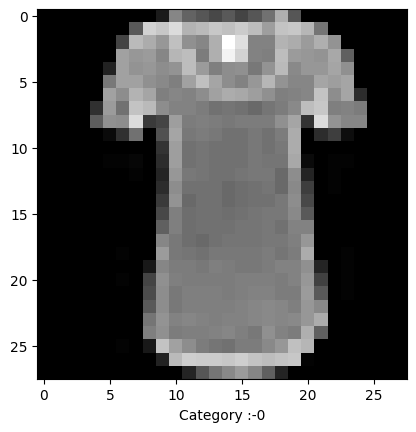

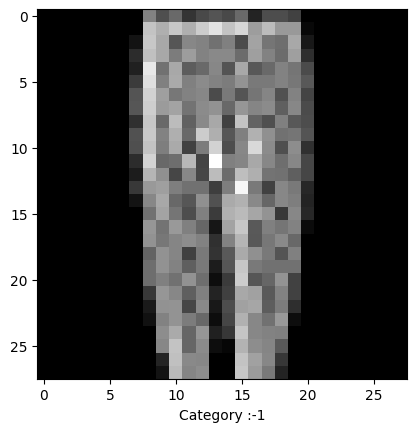

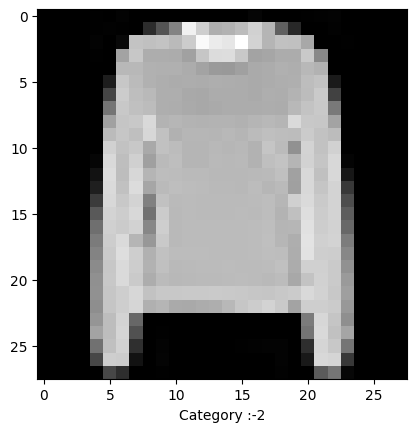

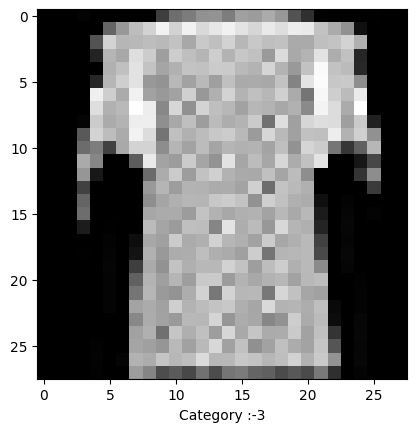

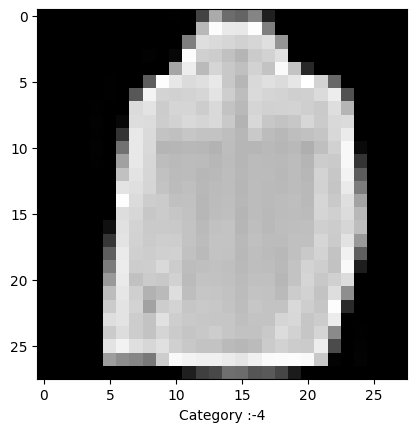

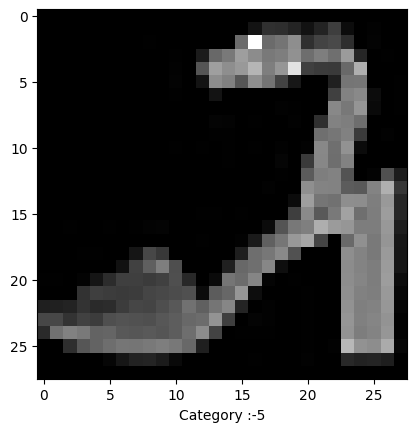

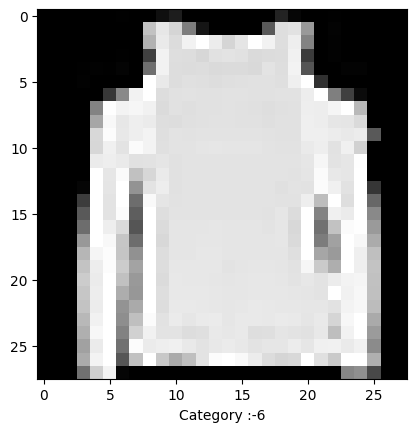

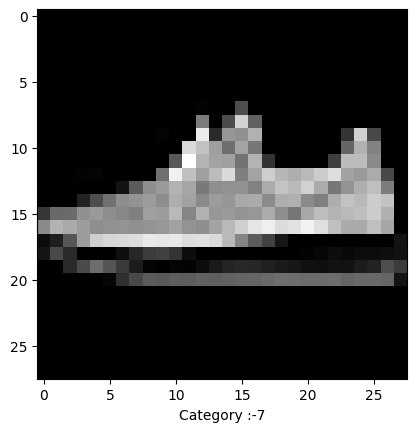

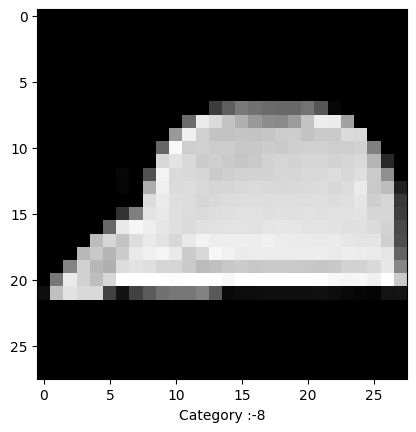

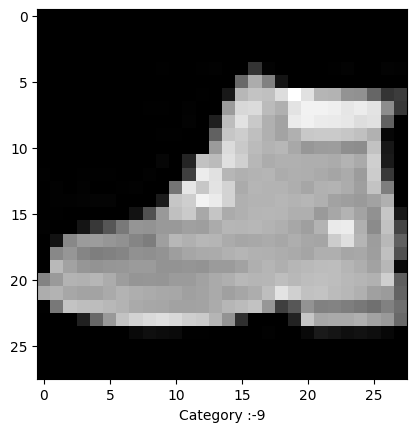

In [5]:
Categories,indexes = np.unique(Y_train,return_index = True,axis = 0)
for i in indexes:
    plt.imshow(X_train[i,:].reshape(28,28),cmap = "gray")
    plt.xlabel("Category :-" + str(Y_train[i,0]))
    plt.show()

In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/Project(WOC)/classification_test.csv" )
X_test = np.array(df1.iloc[0:10000,1:785])

In [7]:
class KNNClassifier:
  def __init__(self,X,Y,k = 7):
    self.X = X
    self.Y = Y
    self.k = k
  def distance(self,p1,p2):
    distances = np.array((p1.shape[0],p2.shape[0]))
    a = np.sum(p1**2,axis = 1,keepdims = True)
    b = np.sum(p2**2,axis = 1,keepdims = True)
    c = np.dot(p1,p2.T)
    distances = np.sqrt(a - 2*c + b.T)
    return distances
  def prediction(self,X_Test):
    distances = self.distance(self.X,X_Test)
    K_Closest_points = np.argsort(distances,axis = 0)[0:self.k]
    Y_pred = []
    for i in range(X_Test.shape[0]):
      labels = []
      for j in range(0,self.k):
        a = K_Closest_points[j][i]
        labels.append(self.Y[a])
      Labels,counts = np.unique(labels, return_counts = True)
      Y_pred.append(labels[np.argmax(counts)])
    Y_pred = np.array(Y_pred)
    Y_pred.reshape(X_Test.shape[0],1)
    return Y_pred
  def CVS(self,X_check,Y_check):
    Y_pred = self.prediction(X_check) 
    return accuracy_score(Y_check.flatten(), Y_pred.flatten())

In [8]:
Accuracy = []
K = []
for k in range(1,40):
  classifier = KNNClassifier(X_train,Y_train,k)
  Accuracy.append(classifier.CVS(X_CVS,Y_CVS)*100)
  K.append(k)
K = np.array(K)
Accuracy = np.array(Accuracy)
k_optimal = np.argmax(Accuracy) + 1
np.sort(Accuracy)
print("K_Optimal = " + str(k_optimal))
KNN_classifier = KNNClassifier(X_train,Y_train,k_optimal)
print(KNN_classifier.CVS(X_CVS,Y_CVS))

K_Optimal = 1
0.836


In [9]:
Accuracy

array([83.6 , 83.6 , 82.82, 82.62, 82.56, 82.48, 82.48, 82.66, 81.92,
       82.26, 82.16, 82.22, 81.82, 82.22, 81.9 , 81.96, 81.88, 81.8 ,
       81.78, 81.92, 81.82, 82.  , 81.96, 81.78, 81.94, 82.04, 82.06,
       82.04, 82.16, 82.14, 82.06, 82.1 , 82.12, 82.1 , 82.28, 82.2 ,
       82.24, 82.1 , 82.06])

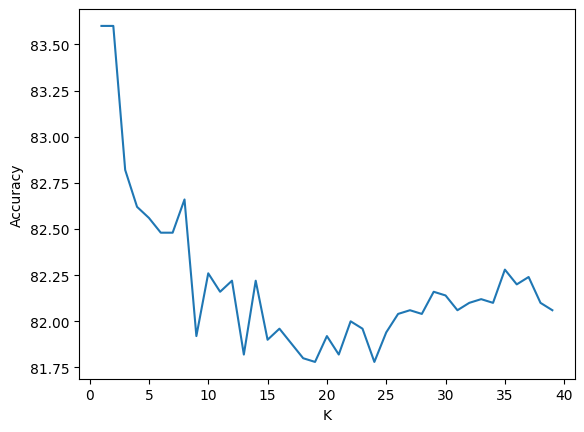

In [10]:
plt.plot(K,Accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [11]:
Accuracy

array([83.6 , 83.6 , 82.82, 82.62, 82.56, 82.48, 82.48, 82.66, 81.92,
       82.26, 82.16, 82.22, 81.82, 82.22, 81.9 , 81.96, 81.88, 81.8 ,
       81.78, 81.92, 81.82, 82.  , 81.96, 81.78, 81.94, 82.04, 82.06,
       82.04, 82.16, 82.14, 82.06, 82.1 , 82.12, 82.1 , 82.28, 82.2 ,
       82.24, 82.1 , 82.06])

In [12]:
output = KNN_classifier.prediction(X_test)
df1["output label"]=output
a = np.array(df1.columns)
df2 = df1.drop(a[1:-1],axis = 1 )
df2
df2.to_csv('/content/drive/MyDrive/Project(WOC)/KNN_output.csv')

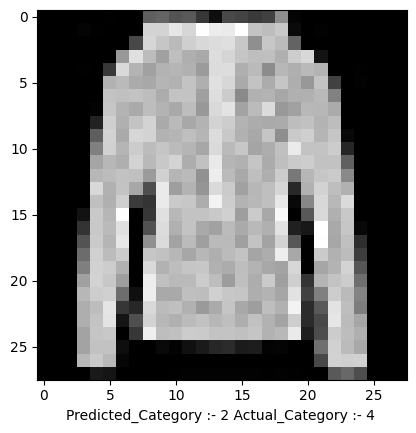

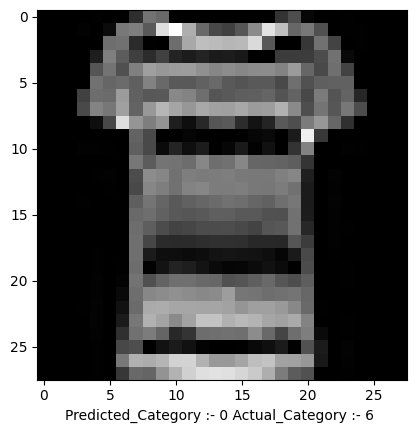

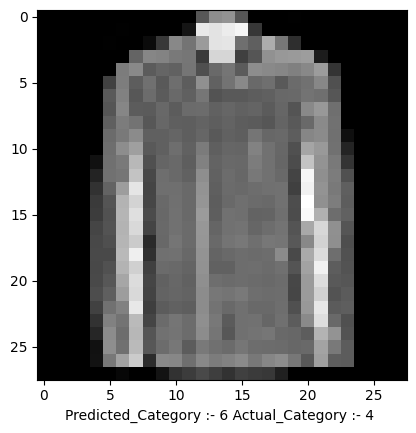

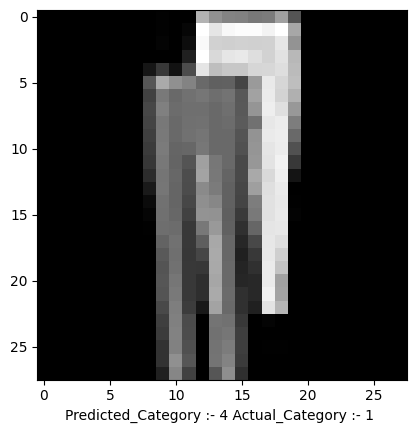

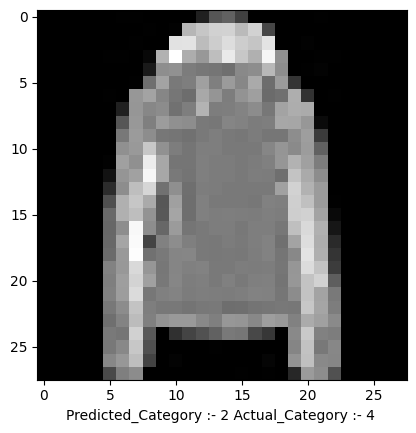

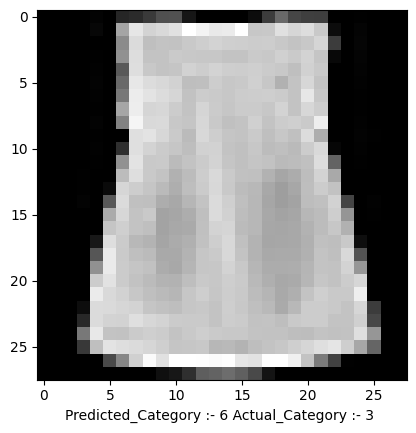

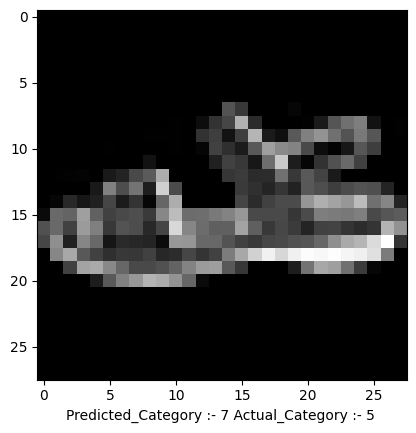

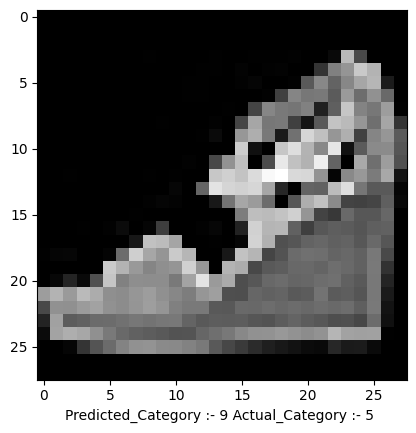

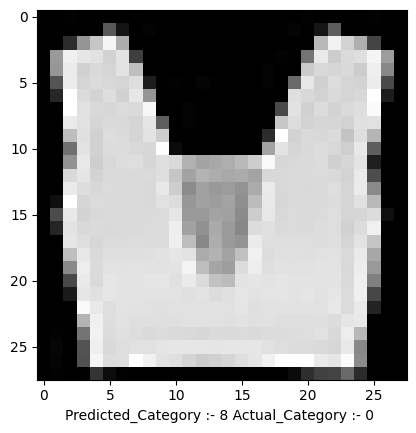

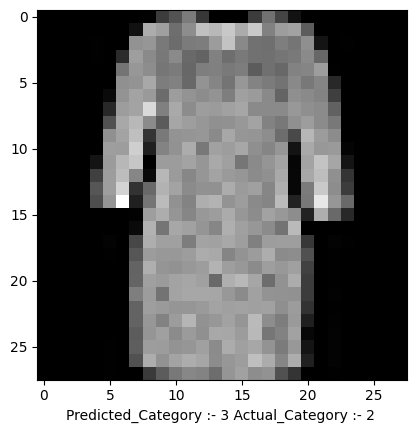

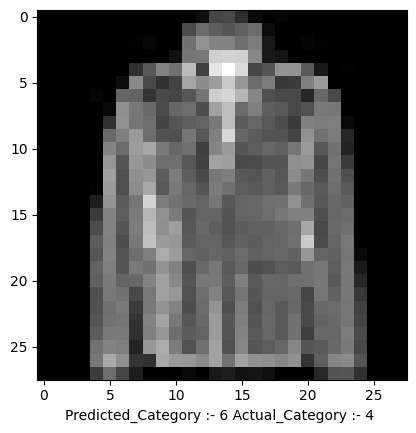

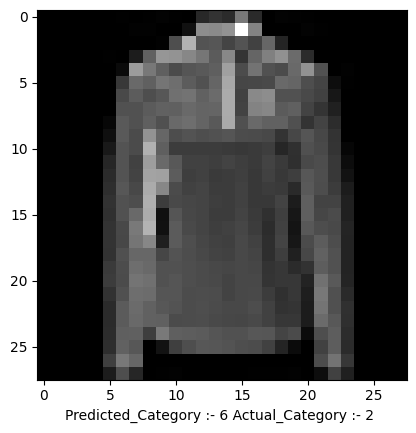

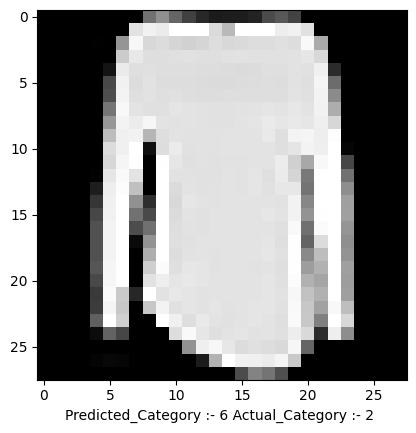

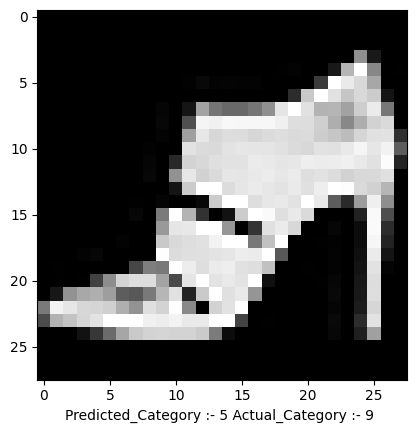

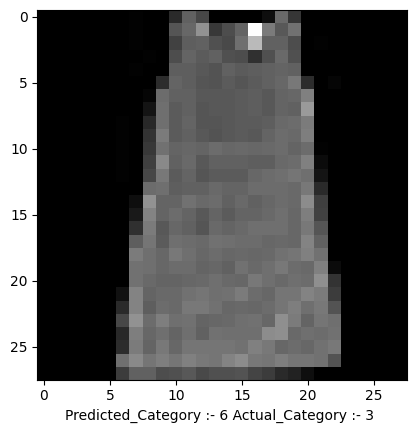

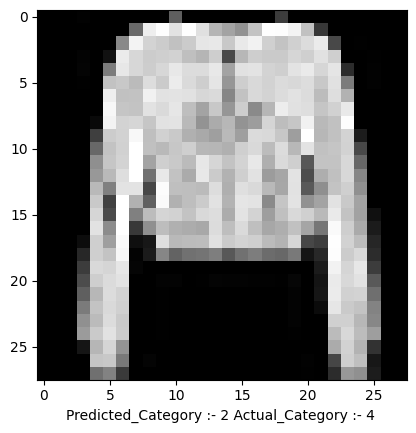

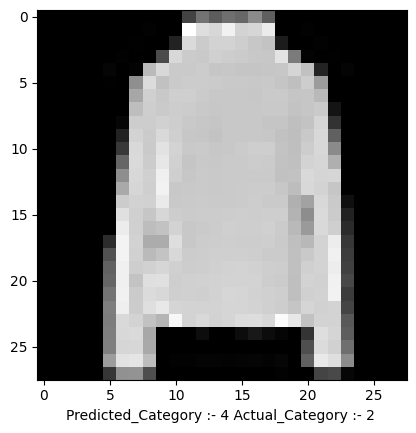

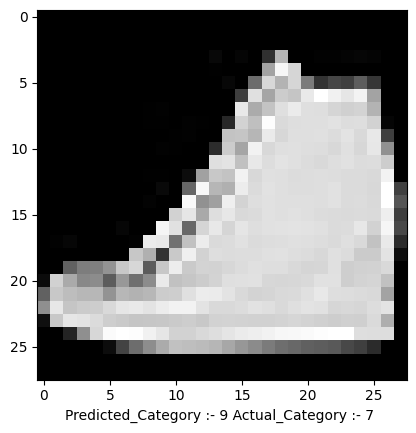

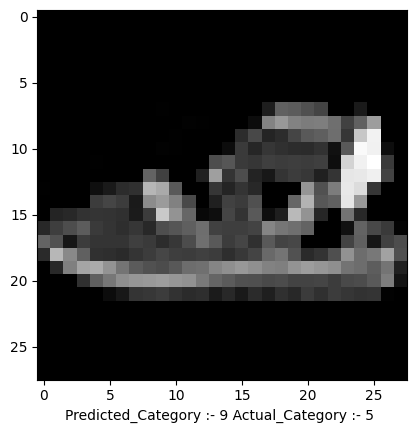

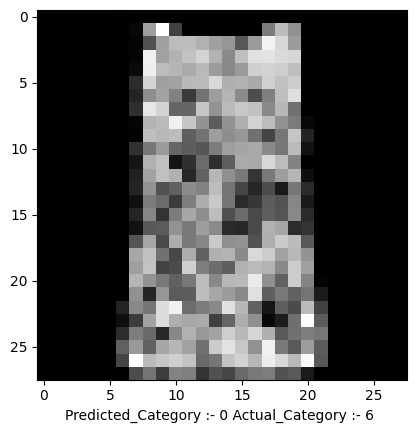

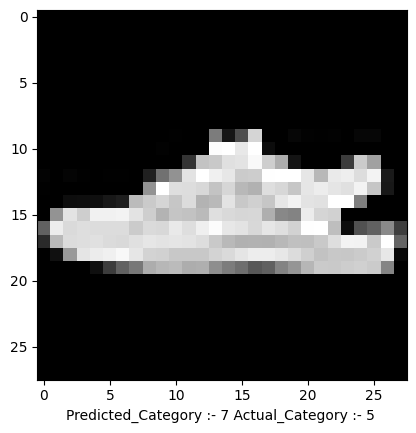

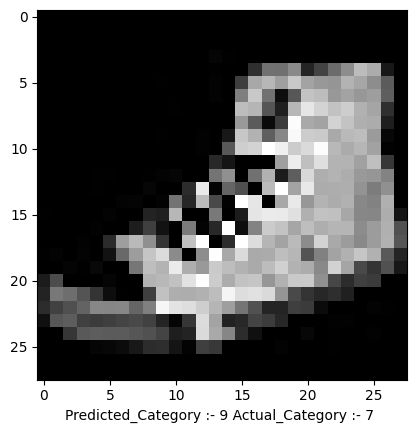

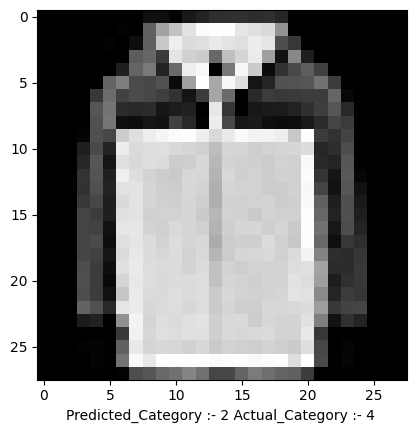

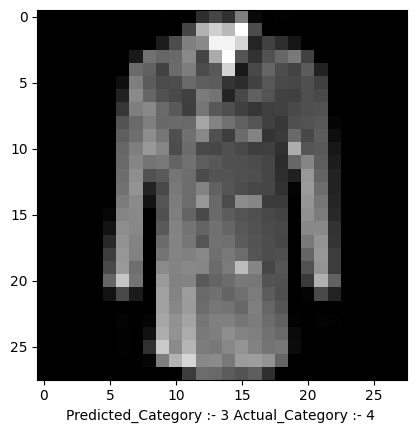

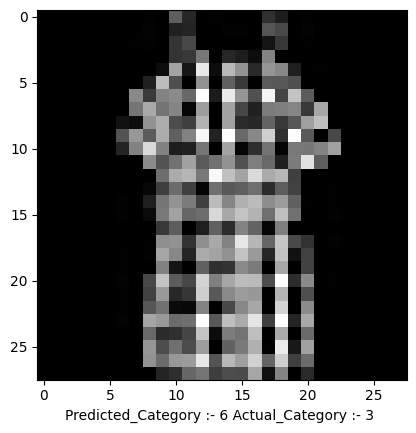

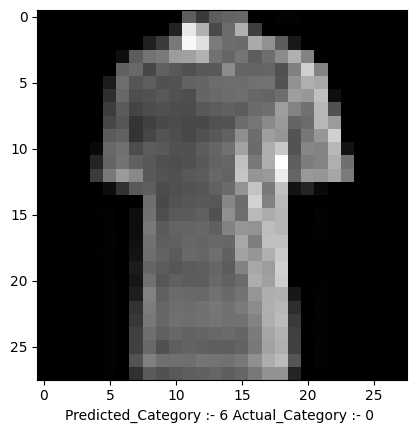

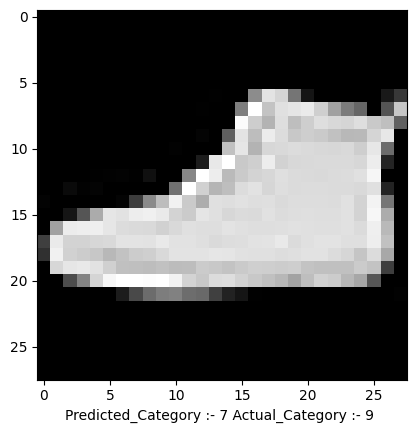

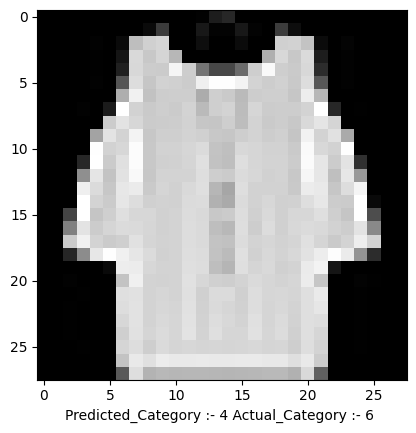

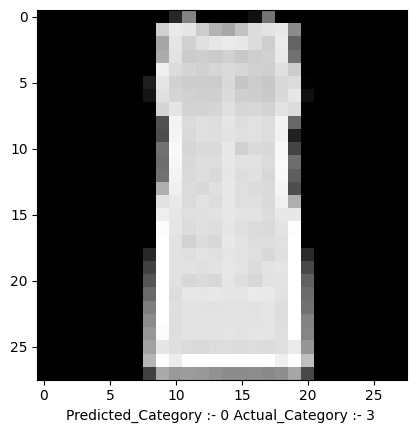

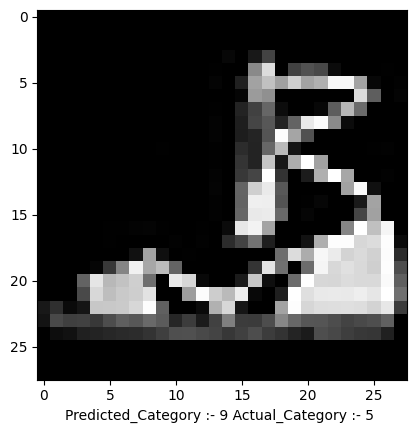

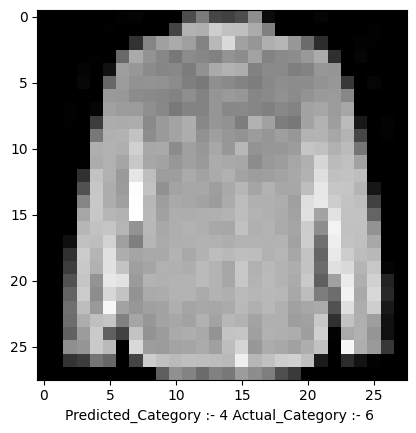

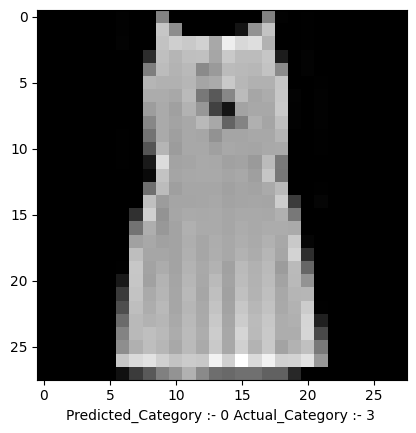

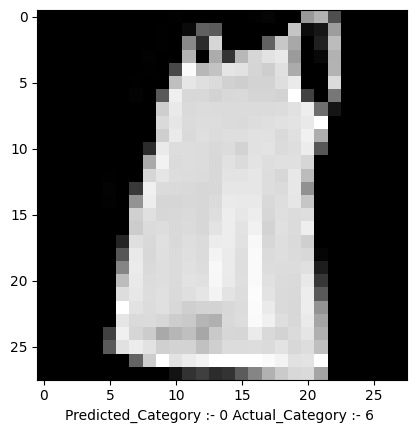

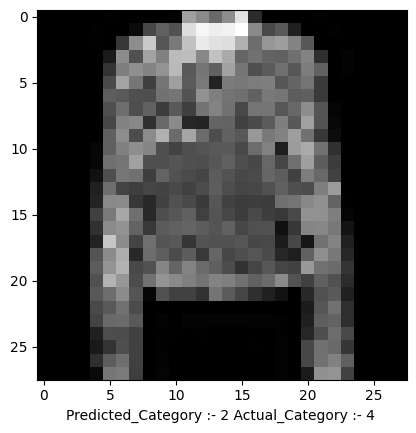

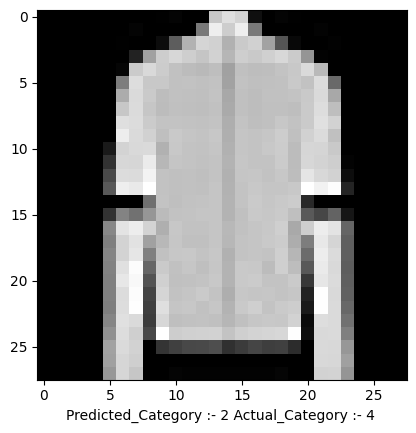

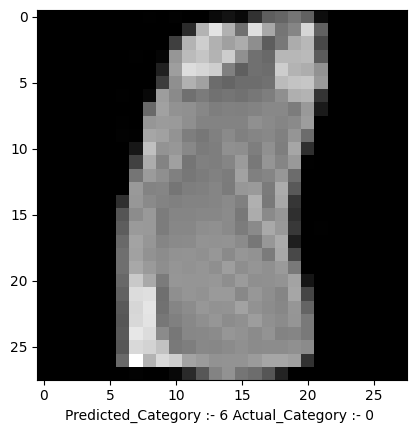

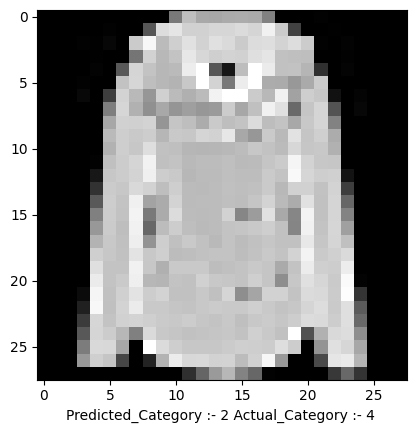

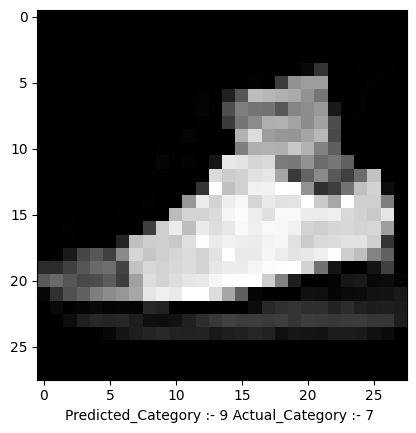

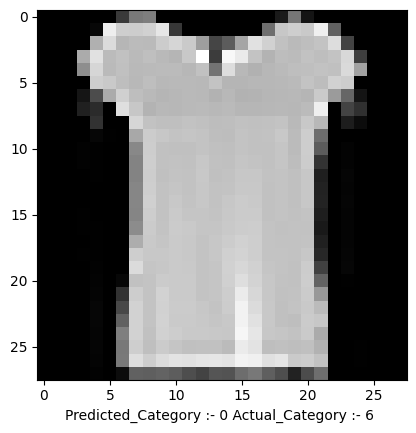

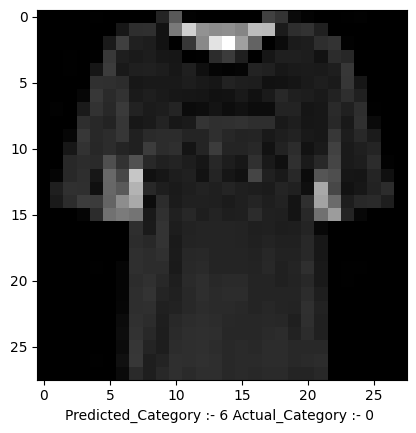

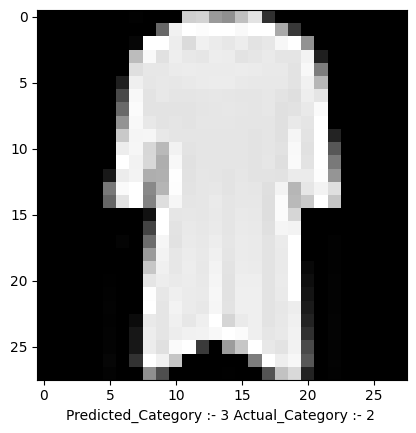

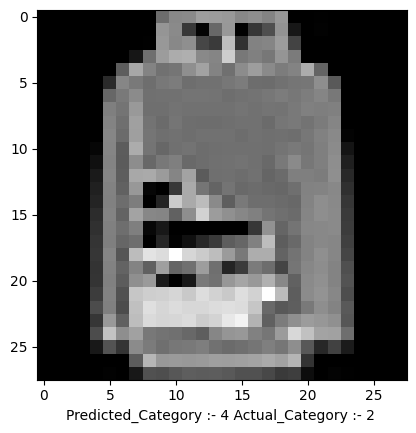

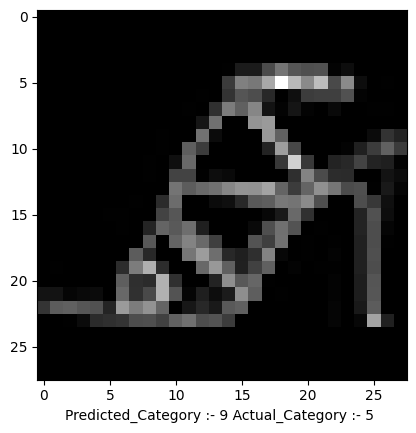

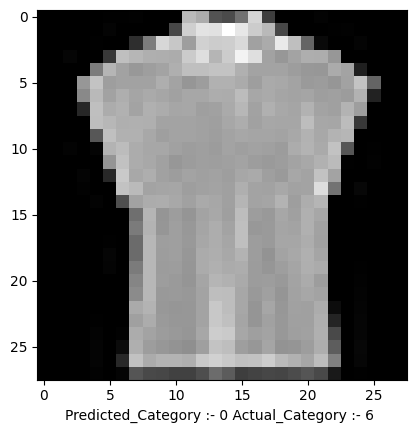

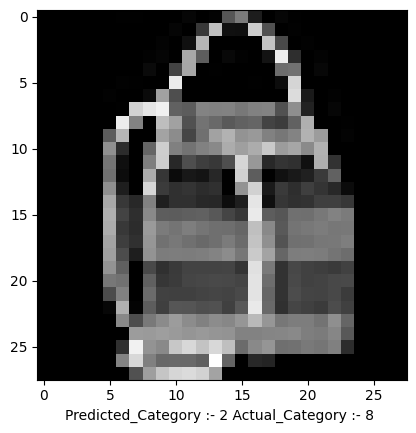

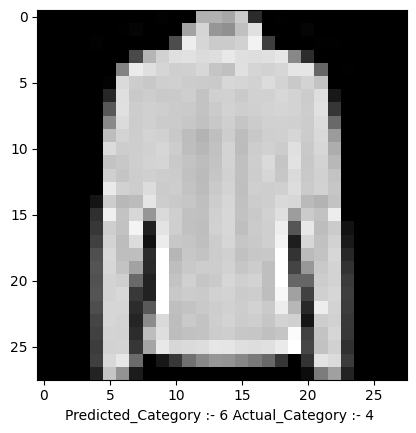

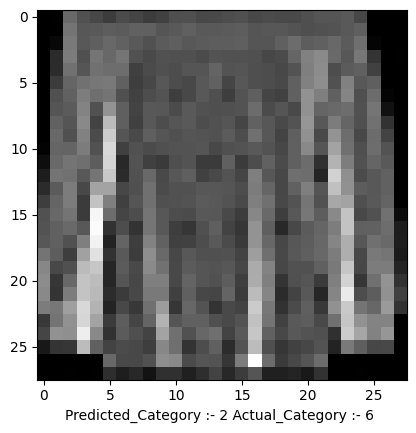

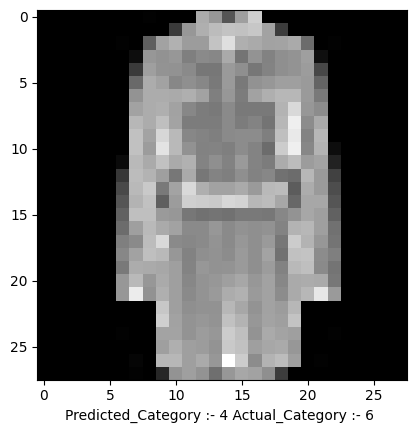

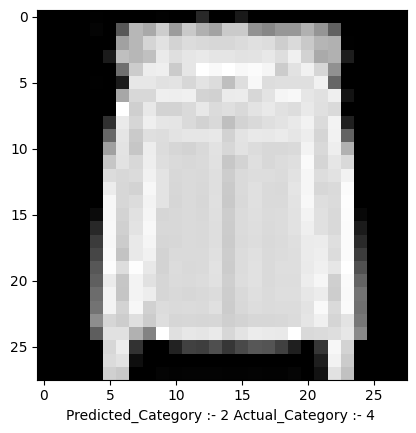

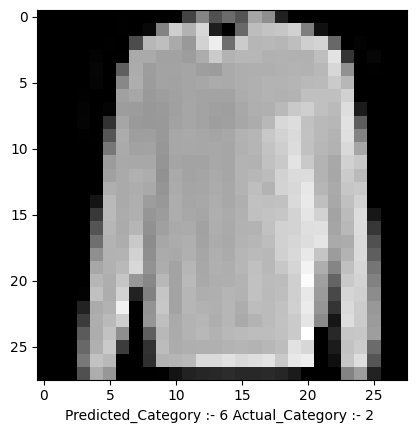

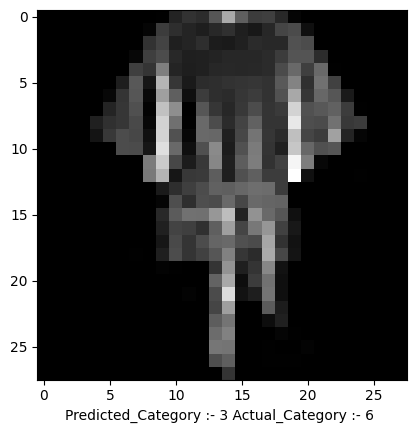

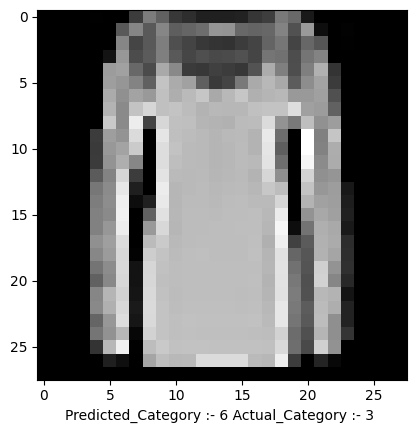

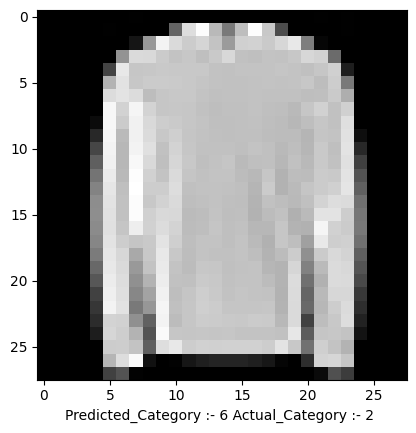

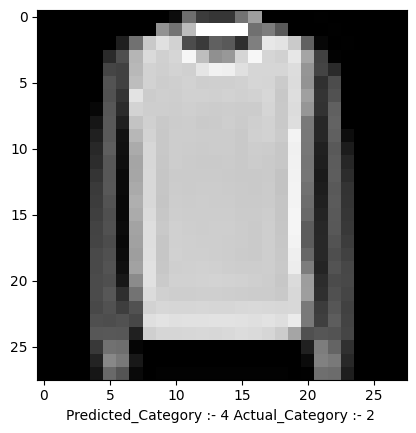

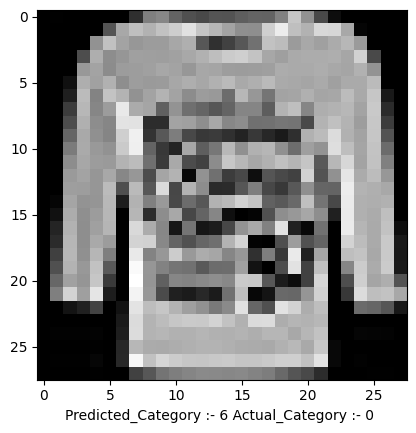

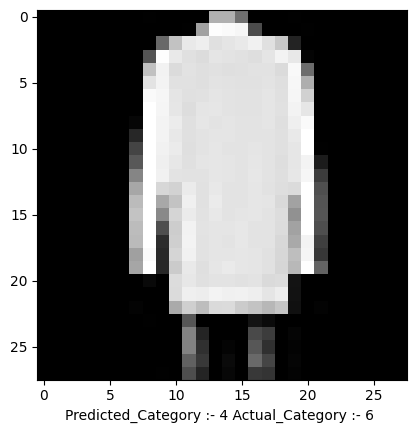

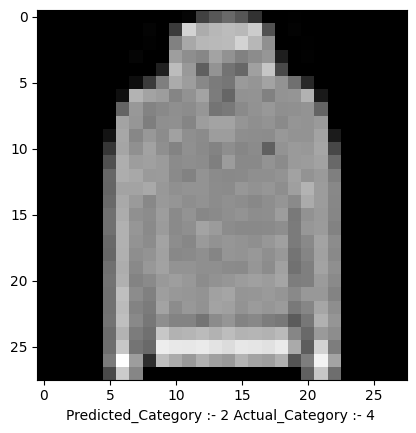

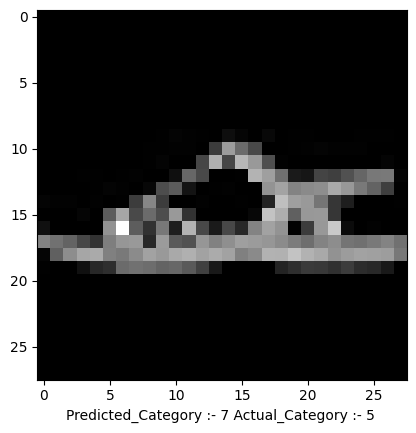

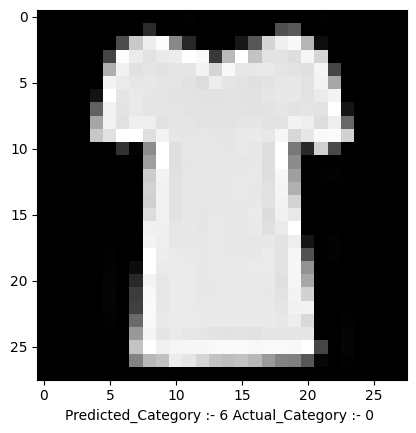

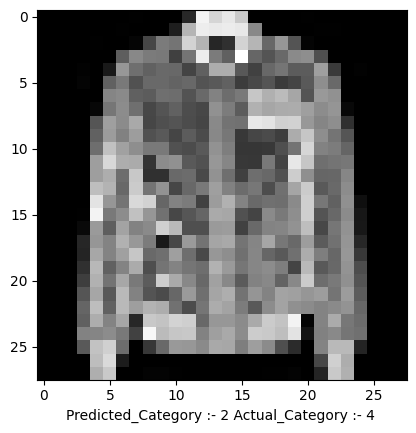

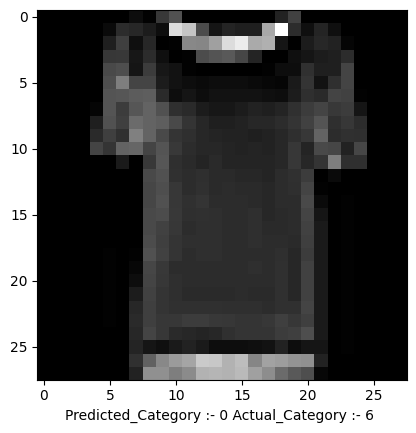

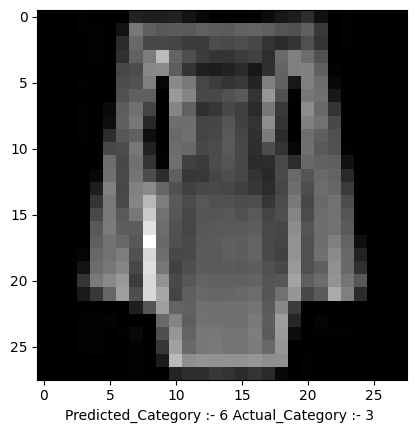

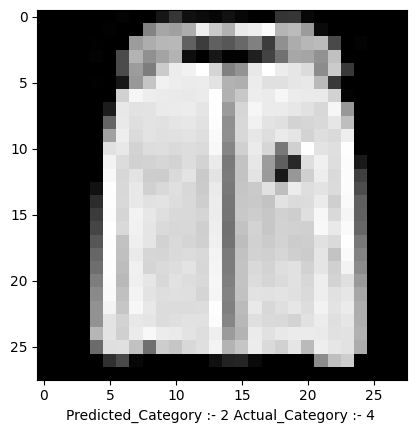

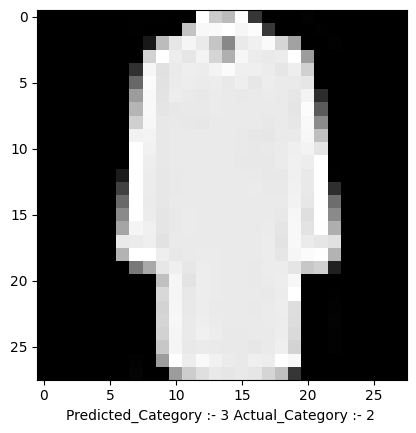

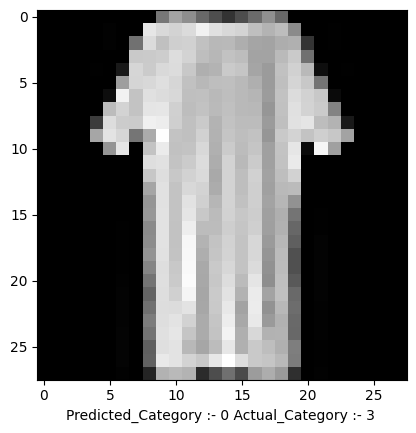

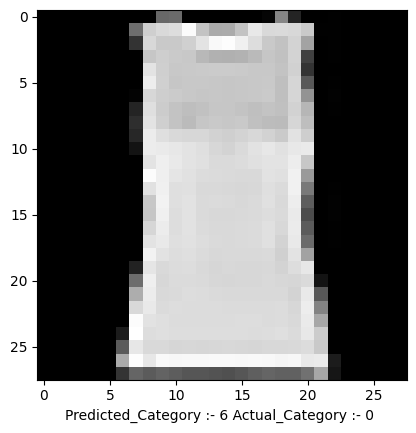

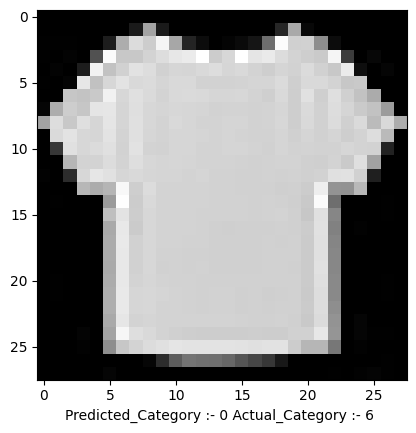

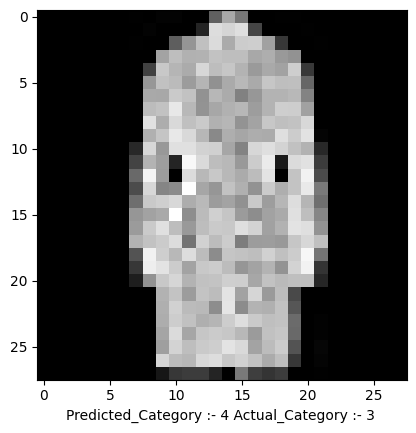

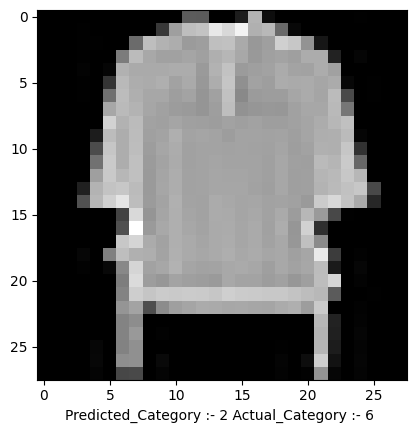

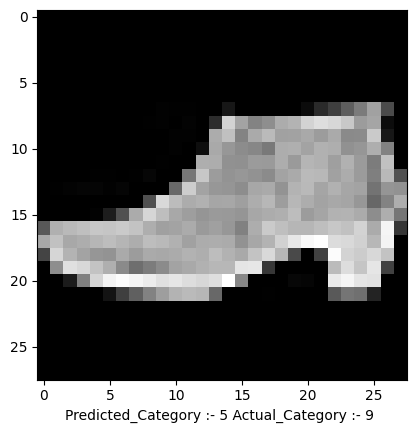

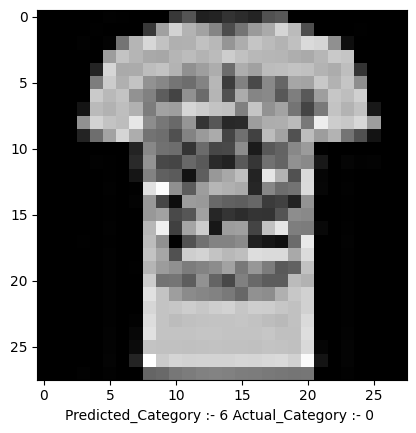

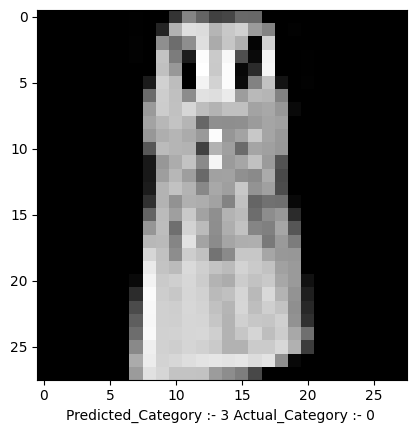

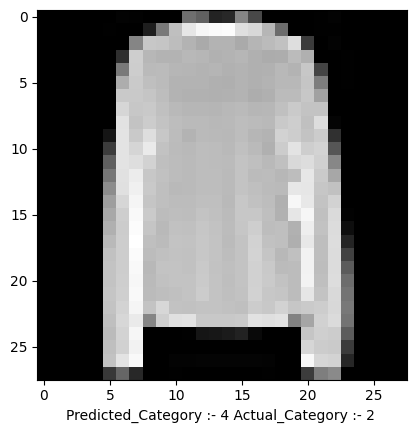

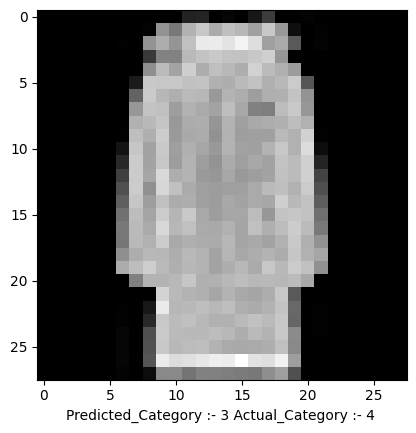

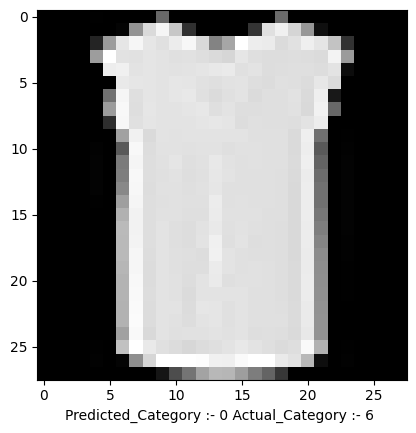

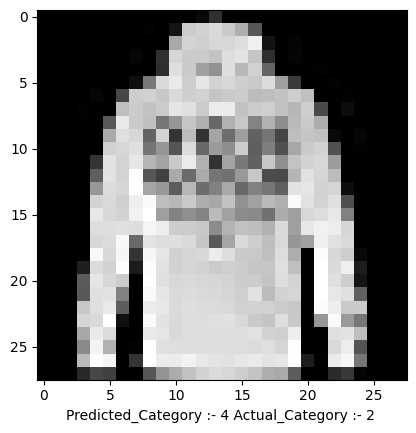

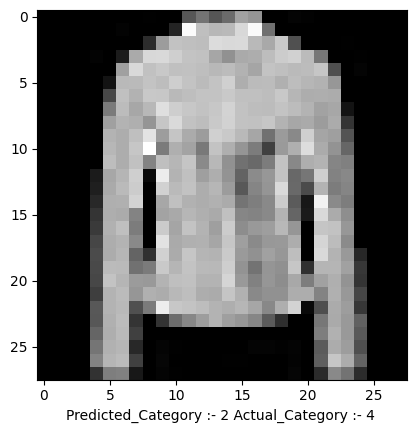

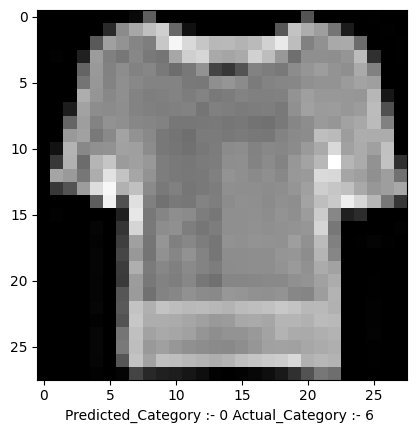

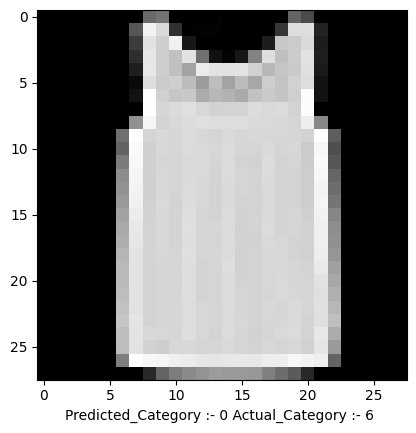

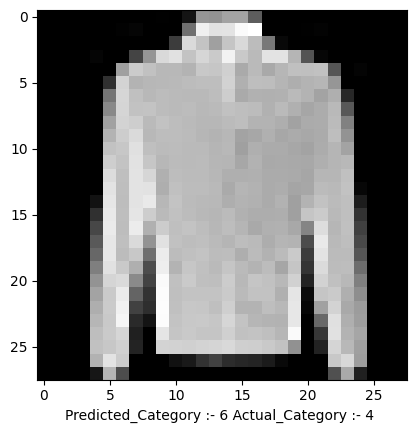

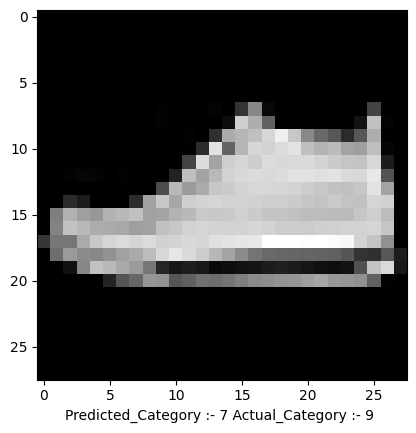

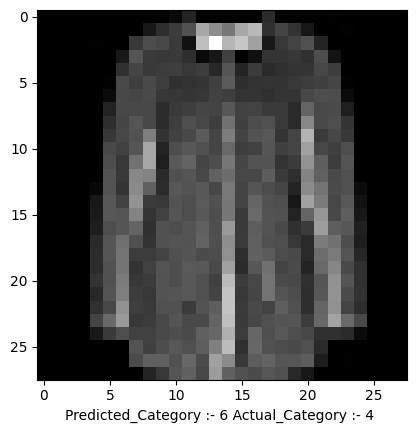

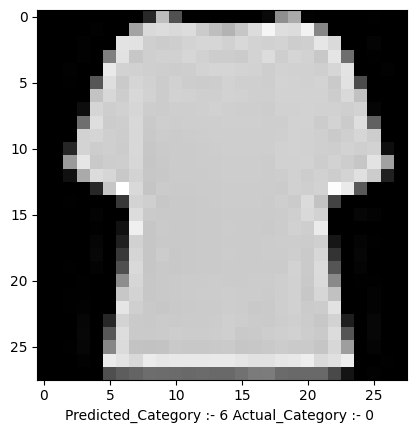

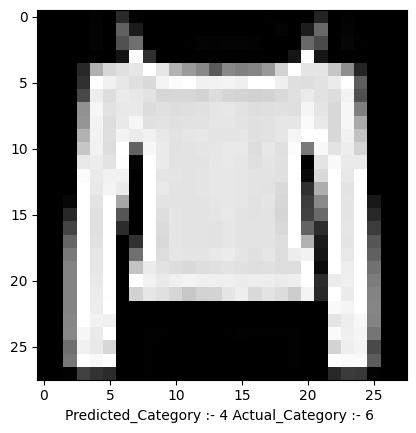

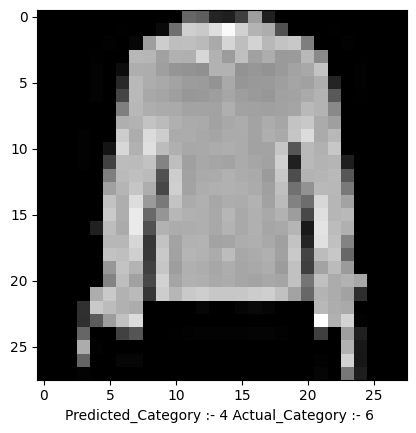

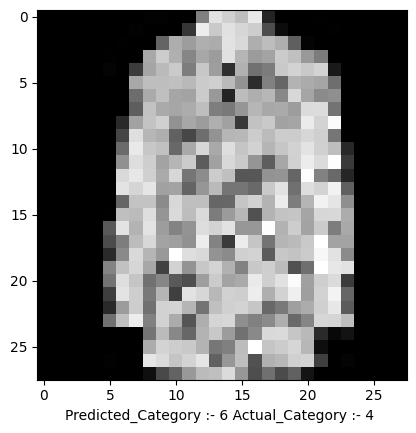

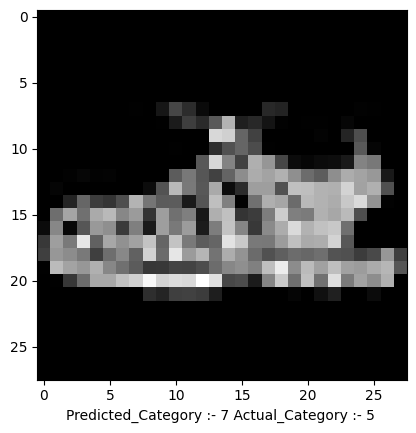

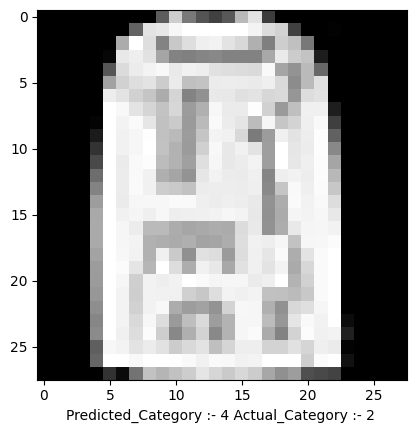

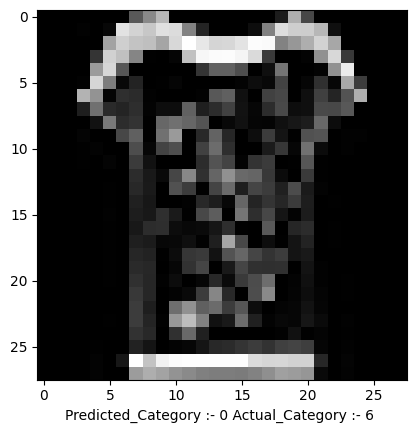

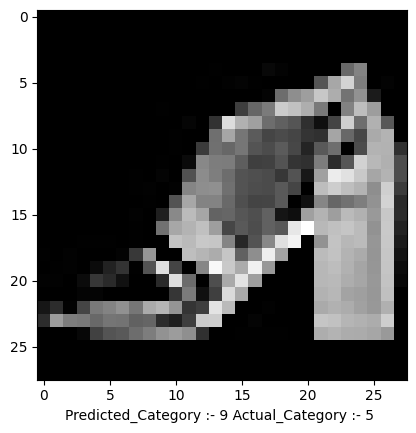

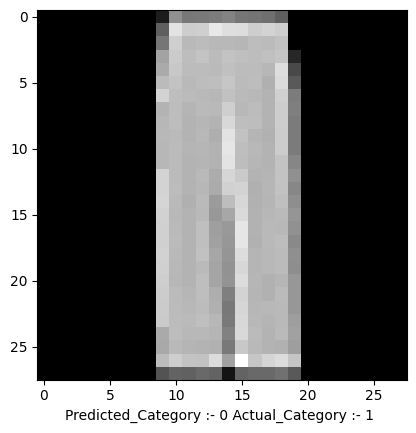

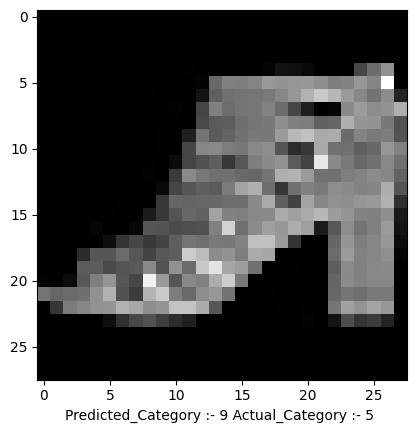

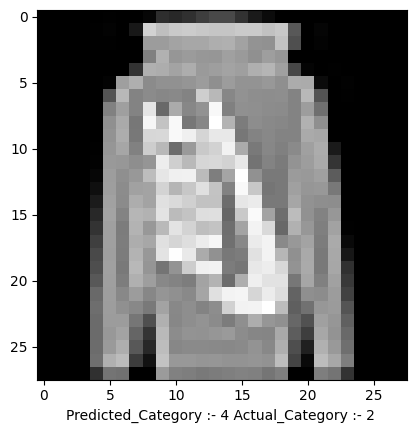

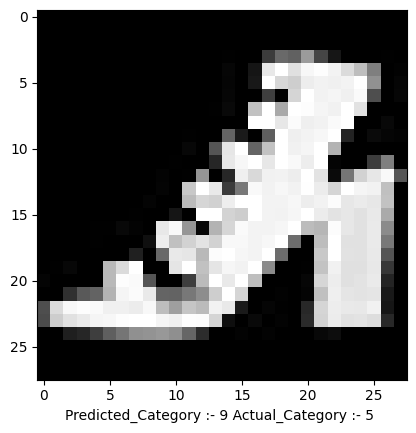

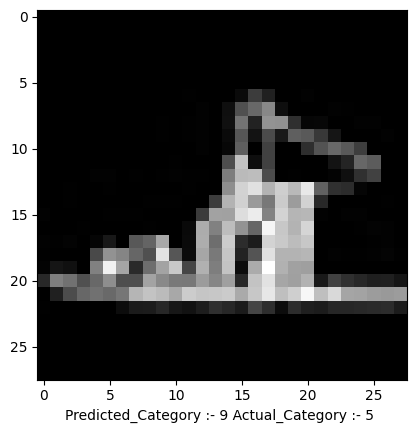

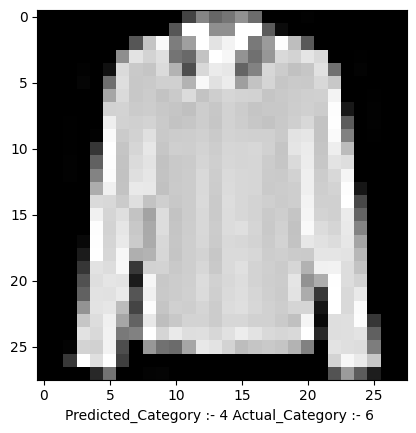

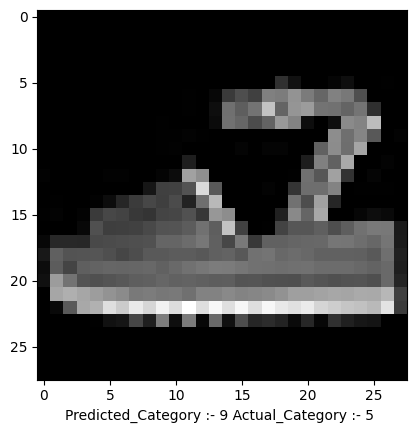

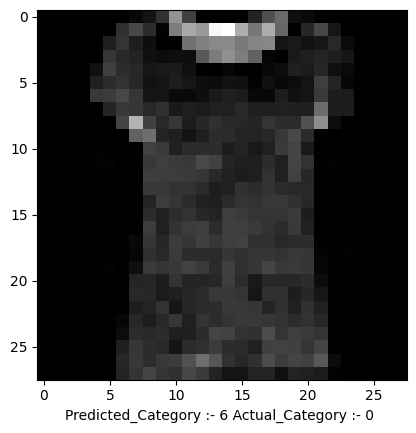

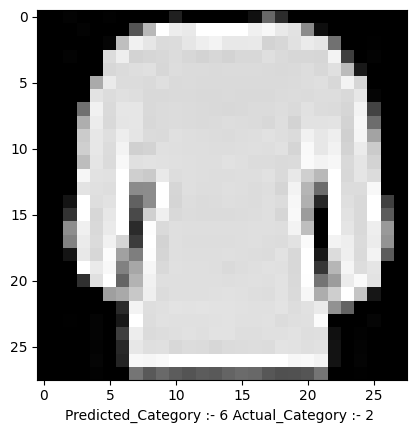

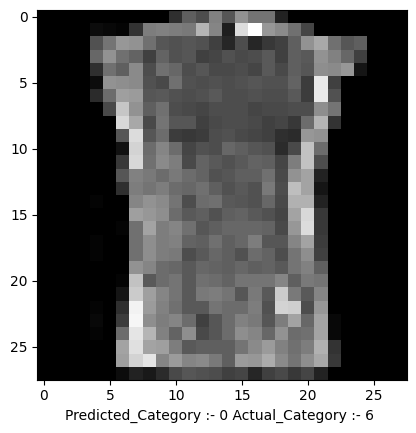

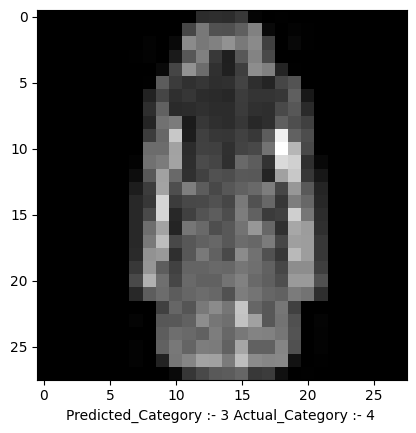

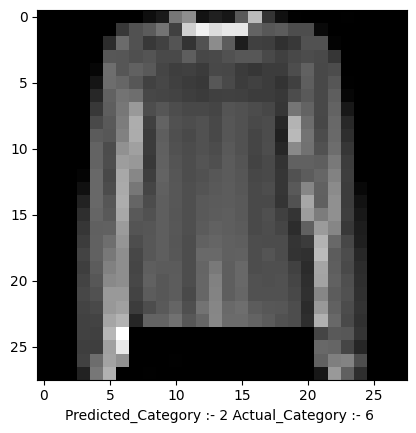

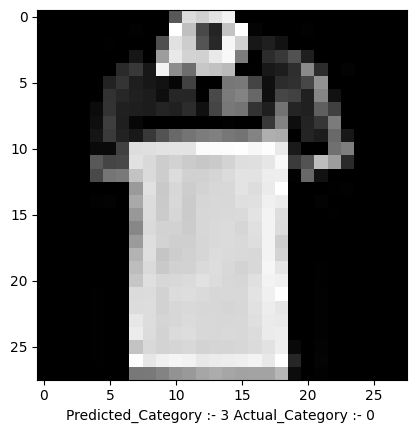

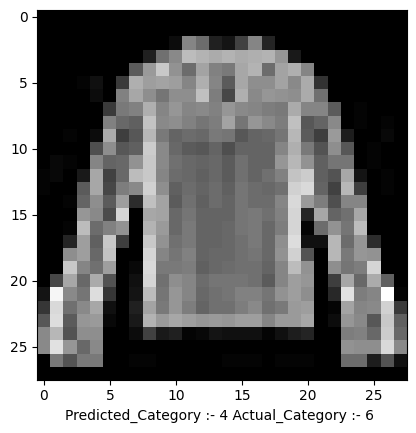

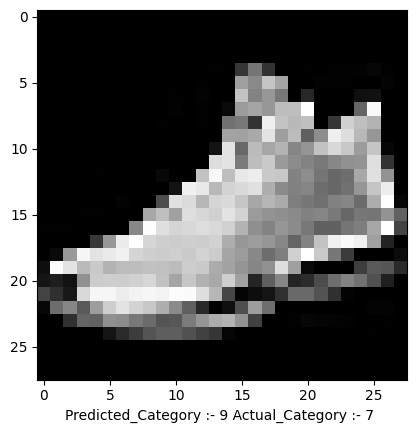

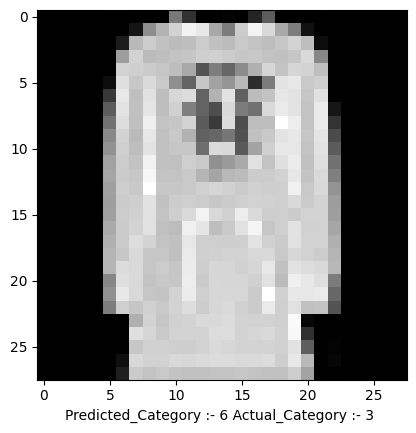

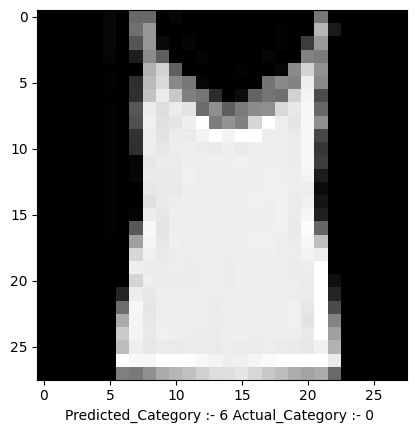

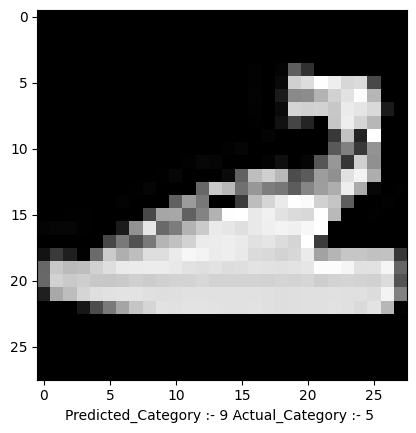

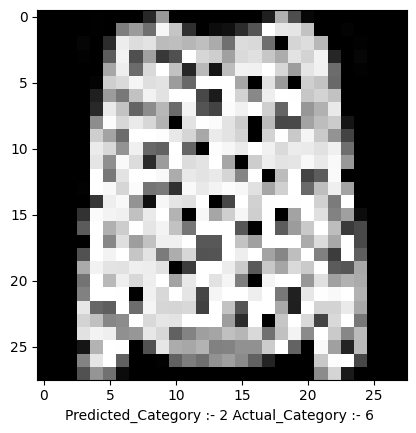

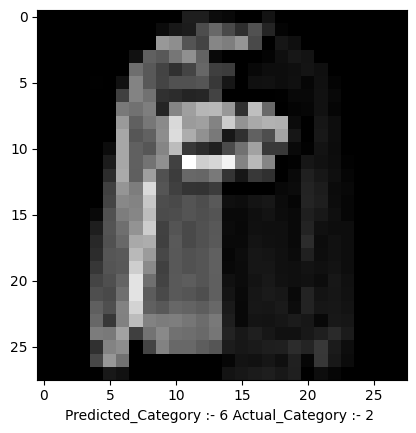

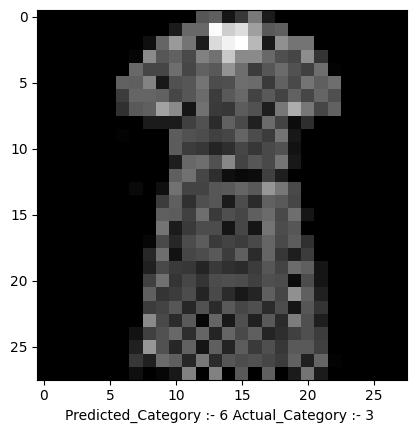

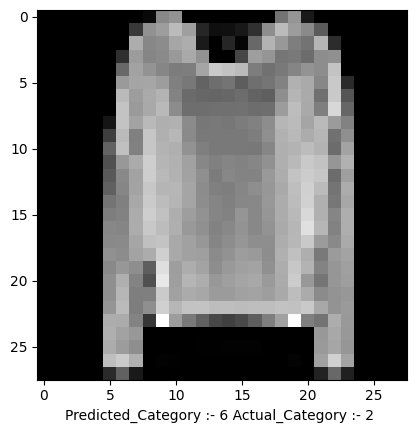

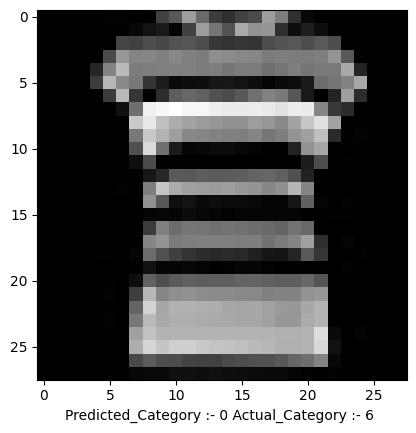

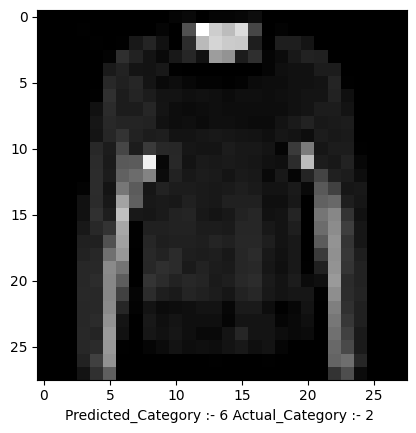

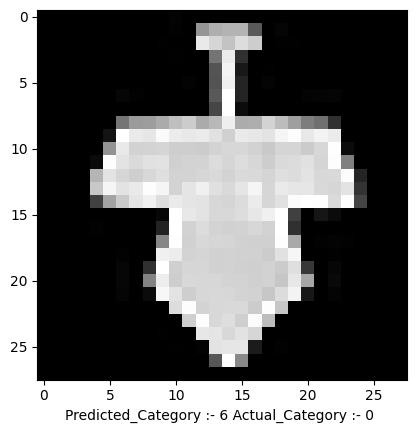

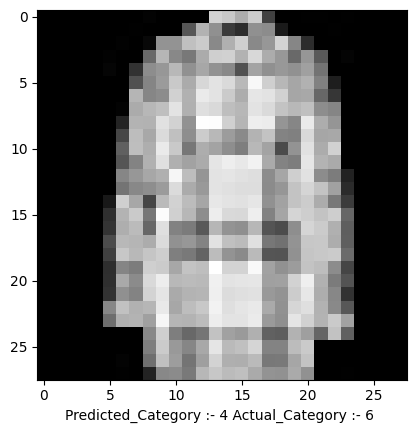

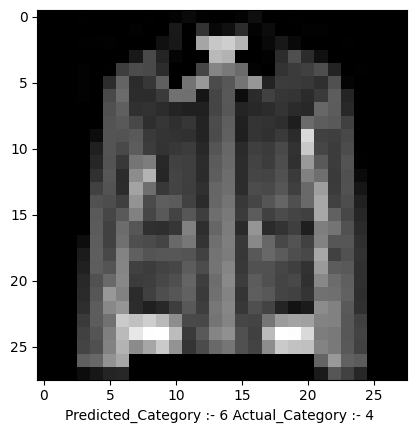

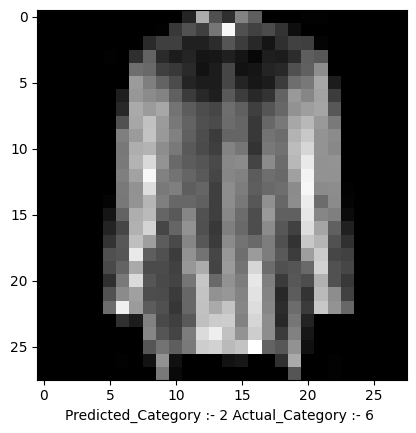

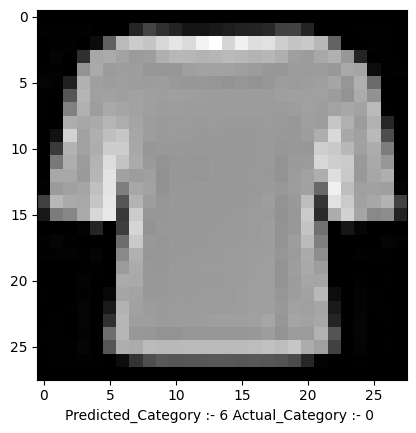

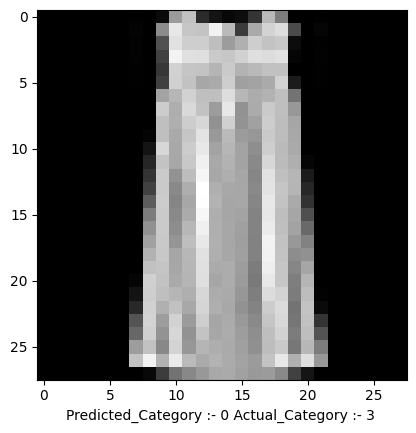

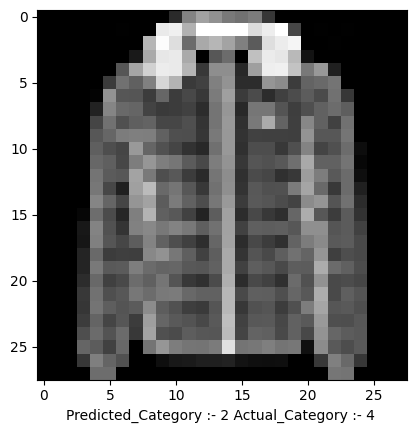

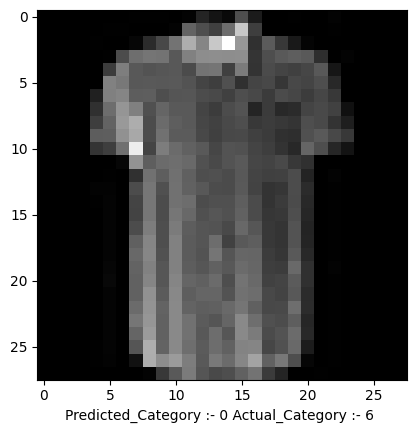

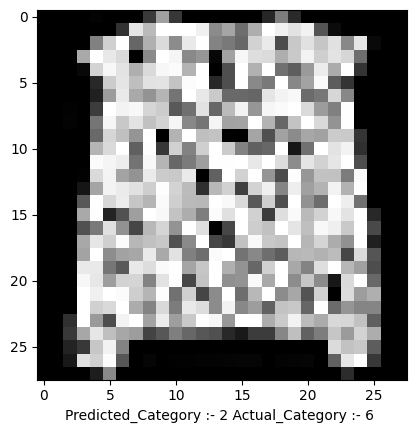

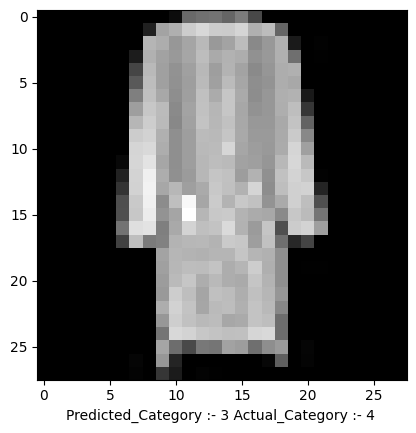

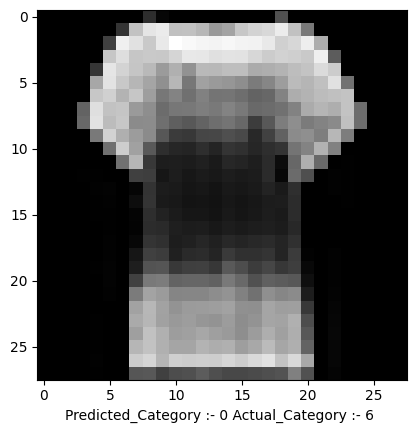

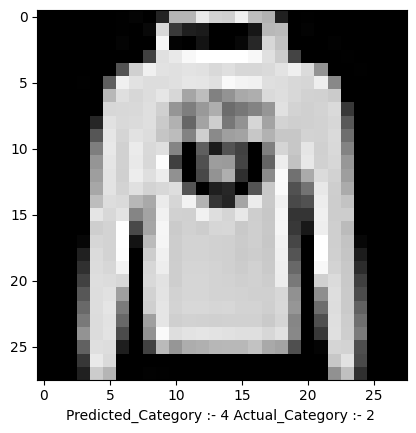

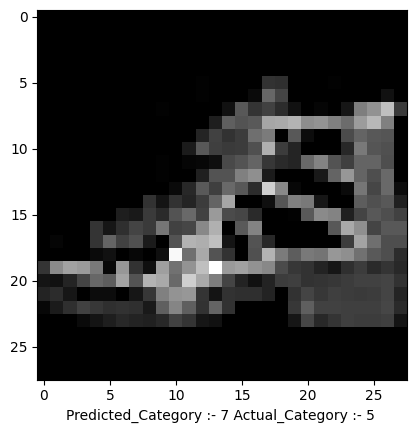

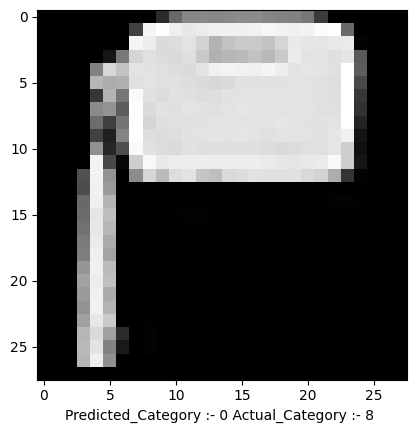

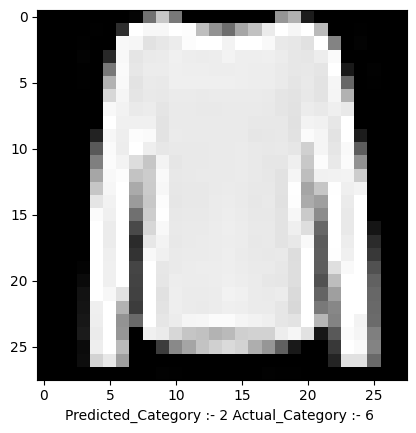

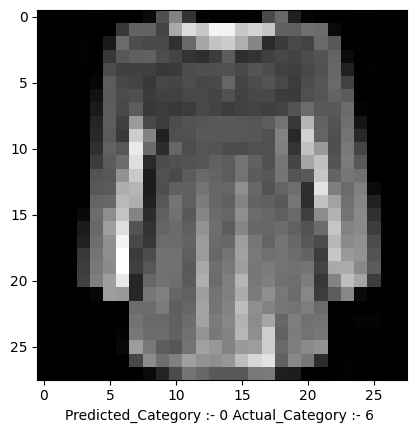

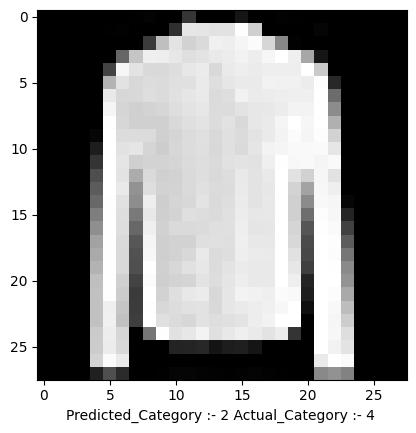

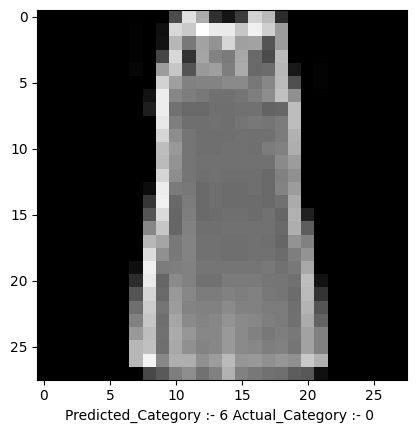

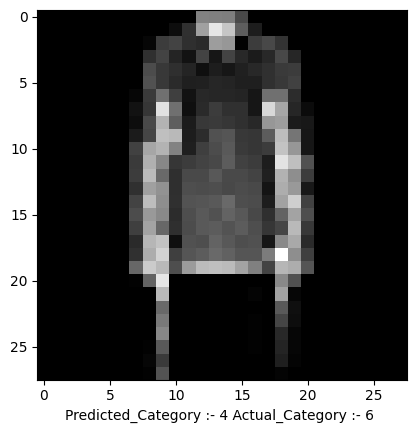

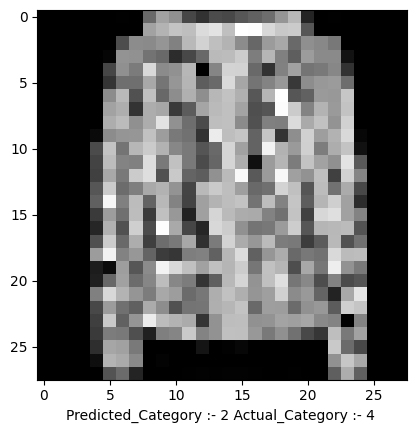

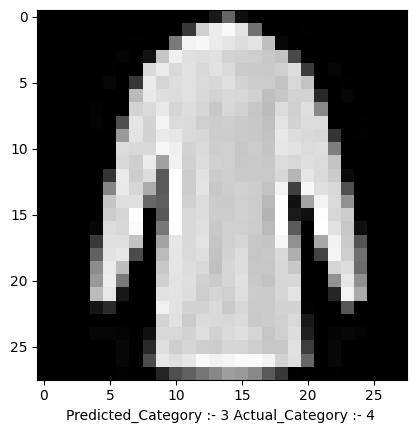

In [13]:
output1 = KNN_classifier.prediction(X_CVS)
for i in range(X_CVS.shape[1]):
  if output1[i,0] != Y_CVS[i,0]:
    plt.imshow(X_CVS[i,:].reshape(28,28),cmap = "gray")
    plt.xlabel("Predicted_Category :- " + str(output1[i,0])+" Actual_Category :- "+ str(Y_CVS[i,0])+" ")
    plt.show()